# Classification Trees in Python



Using **scikit-learn** and **Cost Complexity Pruning** to build this **Classification Tree** (below), which uses the **[UCI Machine Learning Repository]** data (https://archive.ics.uci.edu/ml/index.php) to predict whether or not a patient has **[heart disease]**:

<img src="tree.png" alt="A Classification Tree" style="width: 600px;">

<!-- The **Classification Tree** will use continuous and categorical data from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has **[heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**
 -->
 
<!-- If you are not already familiary with these terms, check out the **StatQuests:** **[Decision Trees Part 1: Building and Using](https://youtu.be/7VeUPuFGJHk)**, **[Part 2: Feature Selection and Missing Data](https://youtu.be/wpNl-JwwplA)** and **[How to Prune Regression Trees](https://youtu.be/D0efHEJsfHo)**. -->



# **Machine Learning at Flatiron Data Science Bootcamp** 
- **Phase 1. Data Engineering Python, Pandas, SQL**
    - Acquiring & cleaning data, missing values, outliers
    - Basic data analysis, data visualization
    
- **Phase 2. Foundation of Statistical Analysis**
    - Predictive & Inferential statistics
    - Hypothesis testing, linear regression
    
- **Phase 3. Building Machine Learning Models**
    - large data sets to build classification engines, supervised learning
    - non-parametric algorithms- kNN, SVM, classification & regression tree 



# **Machine Learning at Flatiron Data Science Bootcamp cont'd** 
- **Phase 4. Advanced Topics**
    - Time Series, Clustering, Rec Systems, Deep Learning & NLP
    - unsupervised techniques, recommender systems, sentiment analysis, ANN

- **Phase 5. Capstone**
    - gathers, explores their own big data, build statistical or ML models 
    - communicate findings w/ data visualization & storytelling techniques


**Classification Trees** are useful machine learning models when you need to to know how the decisions are being made and each step in the decision making process is easy to understand.

In this lesson you will learn about...

- **1. [Importing Data](#download-the-data)**

- **2. [Data Exploration](#identify-and-deal-with-missing-data)**
    - Identifying Missing Data
    - Basic Descriptive Statistics
    - univariate & bivariate analysis

- **3. [Modelling: Formatting the Data for Decision Trees](#format-the-data)**
    - Splitting data into Dependent and Independent Variables
    - One-Hot-Encoding
    - Building a Preliminary Classification Tree

- **5. [Optimzing the tree with Cost Complexity Pruning](#prune-tree)**
    - Visualizing Alpha
    - Using Cross Validation to find the best value for Alpha


- **6. [Building, Drawing, Interpreting and Evaluating the Final Classification Tree](#draw-tree)**


# 1. Import the modules that will do all the work
- The very first thing we do is load in a bunch of python modules. 
- Python, itself, just gives us a basic programming language. 
- These modules give us extra functionality to import the data, clean, and format 
- Other modules then build, evaluate, and draw the classification tree. 


# 1.1 Importing the modules

NOTE: You will need Python 3 and have at least these versions for each of the following modules: pandas:0.25.1, numpy:1.17.2, sklearn:0.22.1

If you installed Python 3 with Anaconda, you can check which version you have with the command: conda list. Run conda update --all to update your version..

In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

# 2. Importing the data as a Pandas DataFrame
Now we load **[Heart Disease Dataset]** in a dataset from the UCI Machine Learning Repository. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

In [2]:
## load the file into your notebook
df = pd.read_csv('processed.cleveland.data', header=None)

# 3. Inspecting the DataFrame

In [3]:
## display the first 5 rows
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
#generate basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## 3.1 Add column names

## The names of column names to format the data:
- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [5]:
## create a list of the column names and add to the DataFrame
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']
## display the first 5 rows (including the column names)


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
## dtypes tell us the "data type" for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [7]:
#another way to confirm the addition of column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# 4.0 Cleaning Data- missing values
The biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not. 

1. Dealing with missing data.
2. Dealing with outliers

**Missing Data** - **NA**
> - We can **delete** the rows that contain missing data. This is relatively easy to do, with `dropna()`
> - We can **impute** the values that are missing with mean, median, mode, etc.


## 4.1 Detecting hidden missing values 

In [8]:
# display the unique values in the column called 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
# display the respective counts for all the unique values in the 'ca' column
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [10]:
# print out unique values in the column called 'thal'


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [11]:
# display the respective counts for all the unique values in the 'thal' column
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

## 4.2 Dealing With Missing Data

Scikit-learn's classification trees do not support datasets with missing values.

In [12]:
# and so we say we want any row with '?' in column 'ca' OR any row with '?' in column 'thal'
len(df.loc[(df['ca'] == '?')  | (df['thal'] == '?')])

6

In [13]:
# print out the rows that contain the missing values
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [14]:
#calculate the percentage of rows with missing values


(303, 14)

So 6 of the **303** rows, or only **2%**, contain missing values. 

Imputing missing values is a big topic and can be the subject of an entire session

In [15]:
# remove rows with missing values by selecting only the complement rows
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [16]:
#checking that the rows have been removed and that the lenght of the df is shortened
len(df)

297

In [17]:
#confirming the absence of the '?' values
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [18]:
#confirming the absence of the '?' values


array(['6.0', '3.0', '7.0'], dtype=object)

## 5.0 Dependent Variable Distribution

In [19]:
#looking at the data type for the dependent (Target) variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [20]:
#what are the unique values for the dependent variable


0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64

### The target varibale must be changed from integer to object, since classification trees require a categorical target variable

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [22]:
#changing the target variable into a binary using the 'replace' method
df['hd'] = df.hd.replace([1,2,3,4], 1)

In [23]:
#confirming the change to a binary variable
df['hd'].value_counts()

0    160
1    137
Name: hd, dtype: int64

<AxesSubplot:>

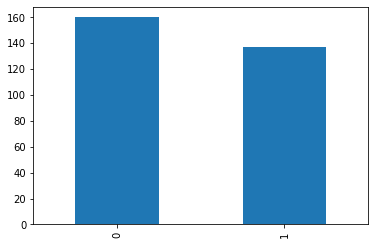

In [24]:
#plotting the distribution of heart disease and no-heart disease patients, using matplotlib


<AxesSubplot:xlabel='hd', ylabel='count'>

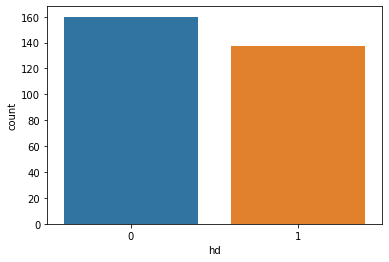

In [25]:
#plotting the distribution of heart disease and no-heart disease patients, using seaborn
sns.countplot(x='hd',data=df)

# 5. Explore the data (Exploratoray Data Analysis)

### EDA is an important aspect of any data analysis or machine learning project. EDA can provide valuable insight into the data and serve as an important guide in data modeling stage.

## 5.1 Distribution of the Numerical Features

In [26]:
#display all the columns that are numerical and the ones that are categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 42.9+ KB


In [27]:
#print out list of all columns


Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'],
      dtype='object')

In [28]:
#create a variable for all columns labeled numerical
num_col = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'hd']

In [29]:
#create variable for all categorical columns
cat_col = ['ca', 'thal']

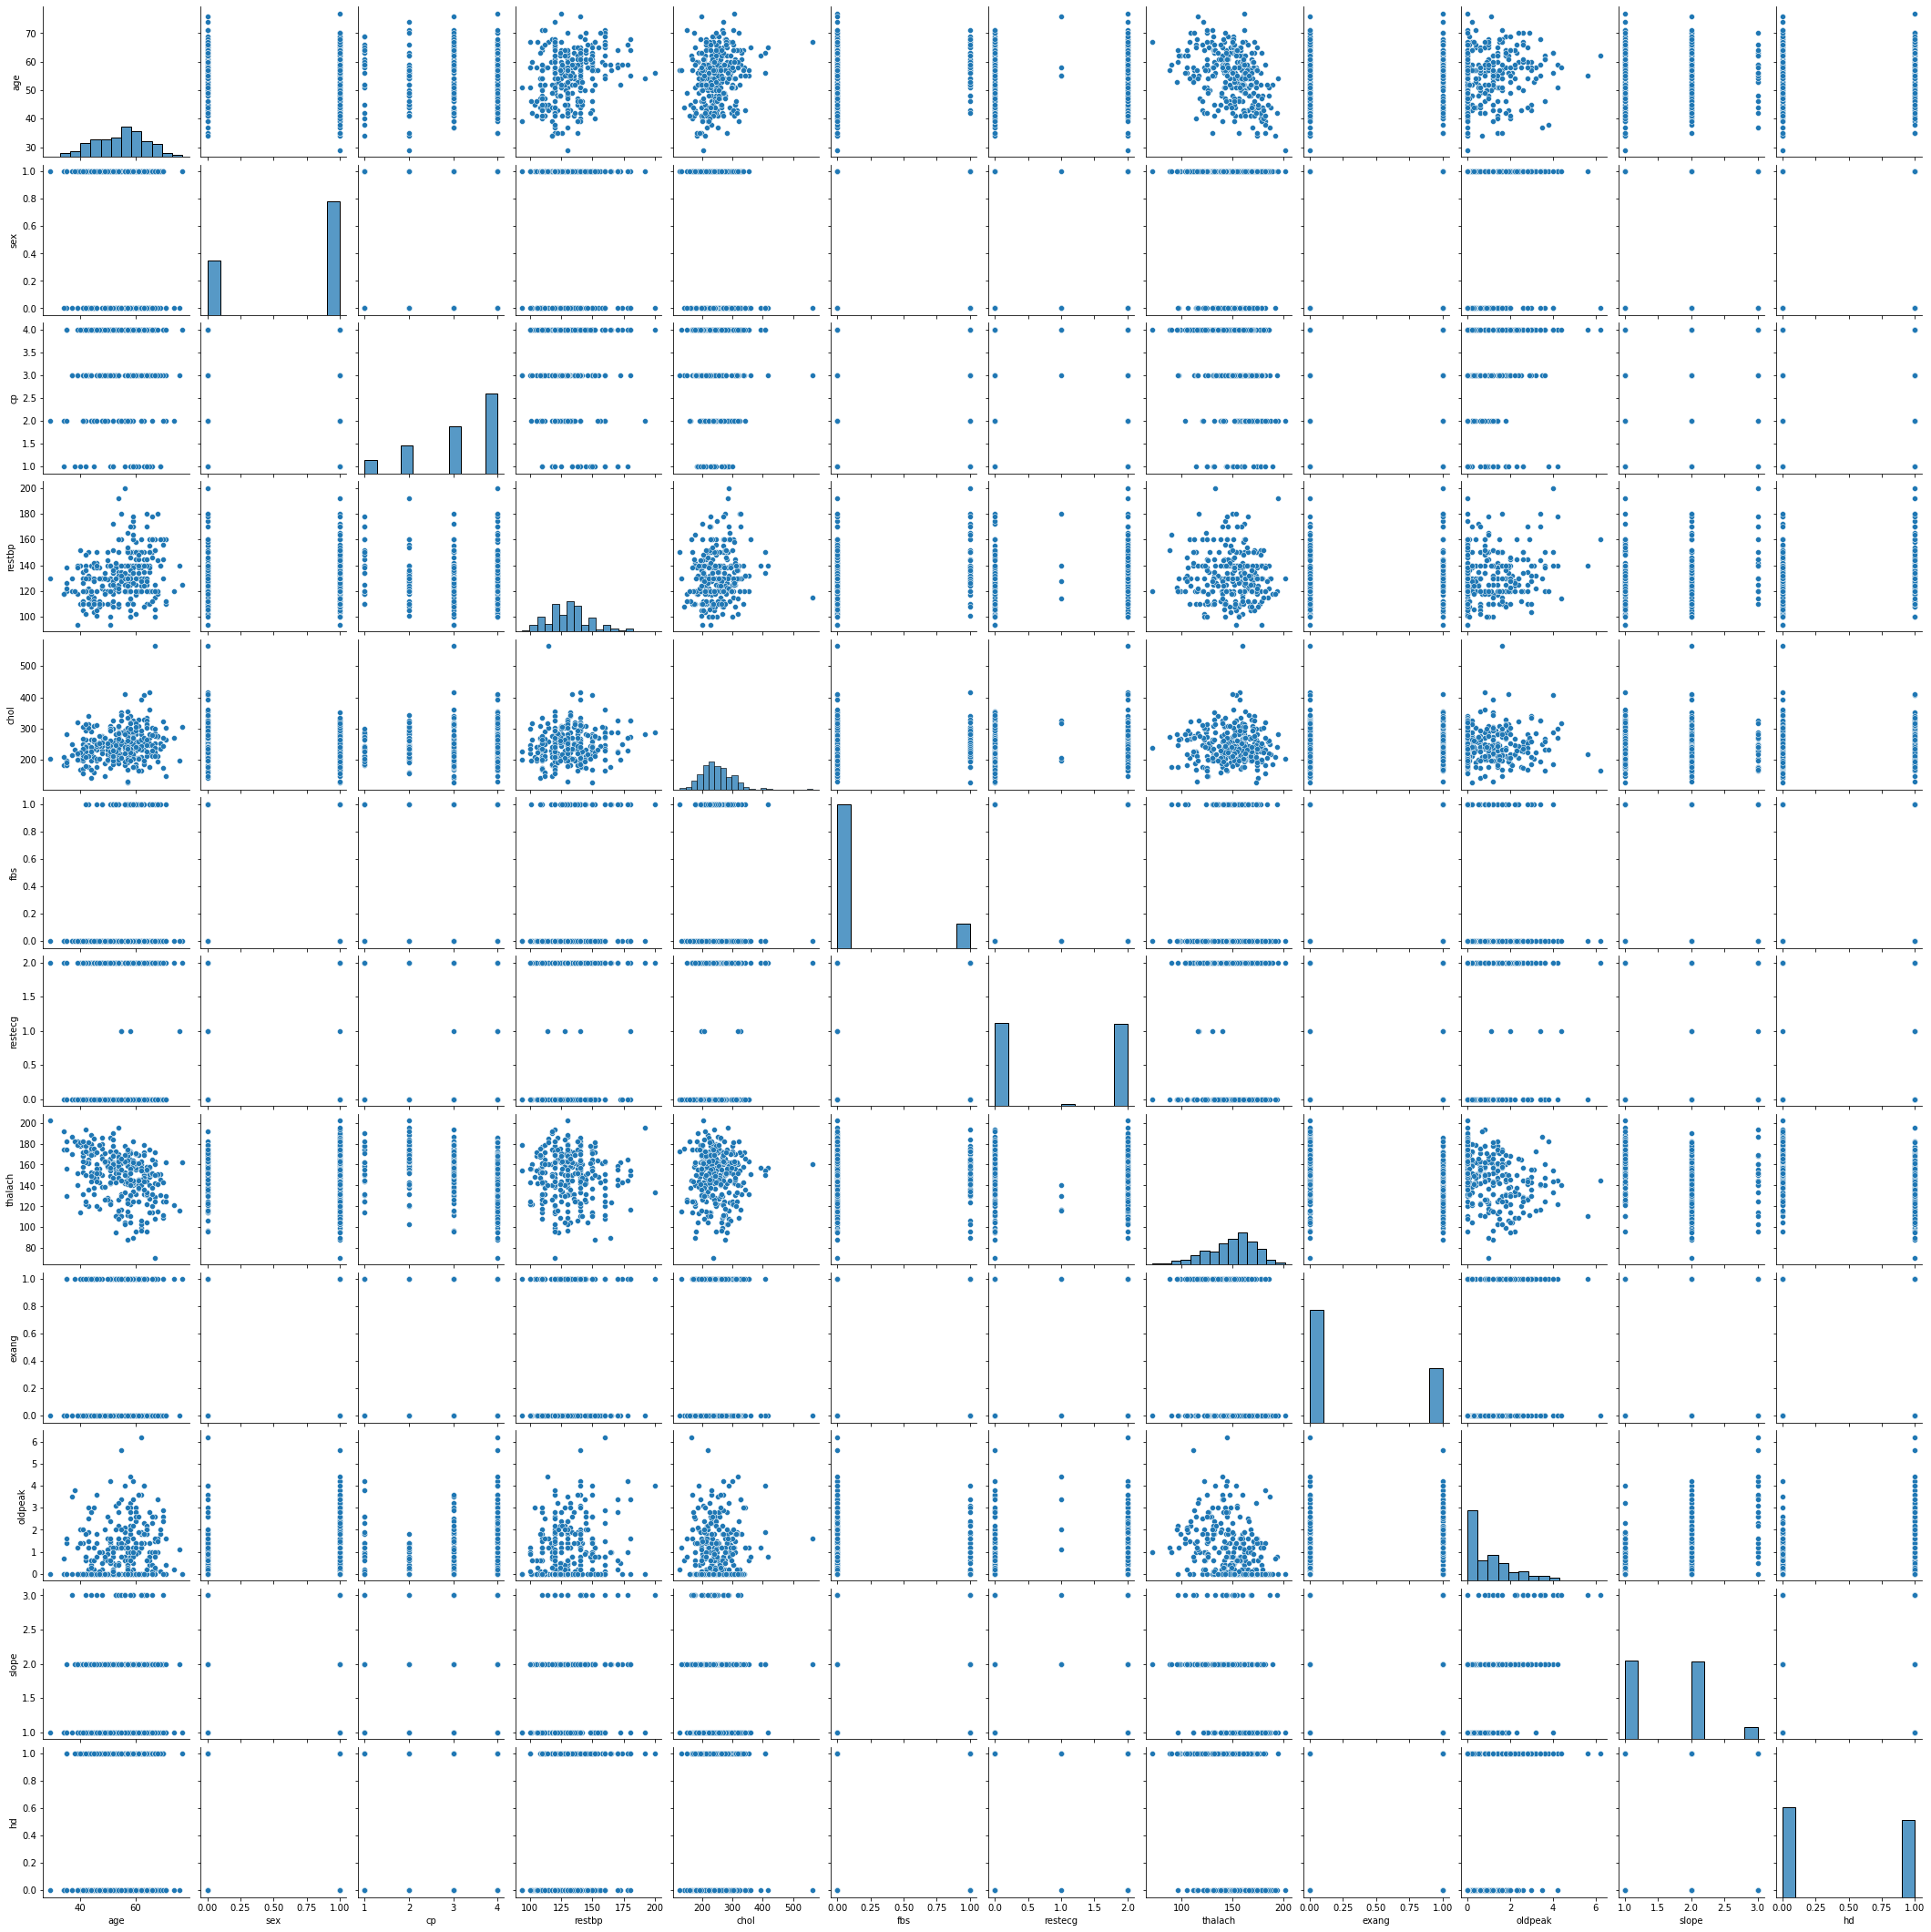

In [30]:
#generate pairplot for all the numerical columns of the dataframe
sns.pairplot(df[num_col])

### Note
Many of the columns labeled float are actually **discrete** values. Variabes such as 'sex', 'cp', 'exang' & 'slope' are actually **categorical** as there is no order asscotied with the values. The others ('fbs' & 'slope') may be **ordinal** variables.
The ***continuous*** numerical variables are: 'age', 'restbp', 'chol', 'thalach', & 'oldpeak'

## 5.1.2 Distribution of the continuous variables

In [31]:
#create a series out of the age column, using [] selection
age_series = df['age']

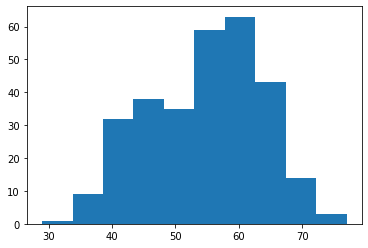

In [32]:
#display the distribution of the age values as a histogram, a matplot lib- plt.hist  


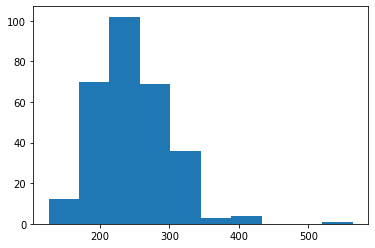

In [33]:
#display distribution of the 'chol' values
chol_series = df['chol']
plt.hist(chol_series)
plt.show()

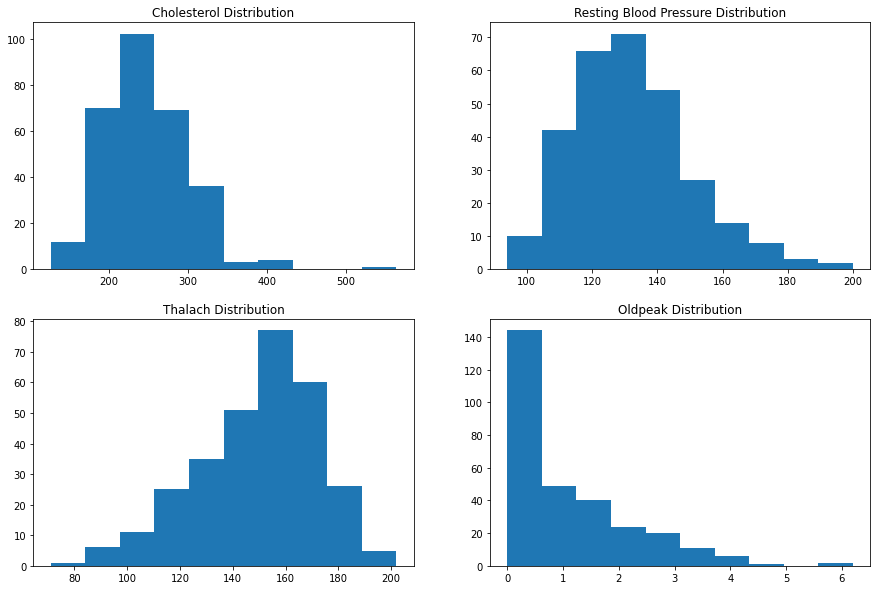

In [34]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax0.hist(df
ax0.set_title('Cholesterol Distribution')

ax1.hist(df['restbp'])
ax1.set_title('Resting Blood Pressure Distribution')

ax2.hist(df
ax2.set_title('Thalach Distribution')

ax3.hist(df['oldpeak'])
ax3.set_title('Oldpeak Distribution')

plt.show()

## 5.1.2 Distribution of the discrete variables

In [35]:
#create a variable of all the discrete variables


In [36]:
#create a DataFrame of the of discrete variable that includes the target variable
df_dis = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'hd']]

<AxesSubplot:>

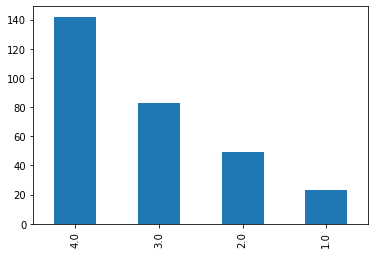

In [37]:
df['cp'].value_counts().plot.bar()

<AxesSubplot:>

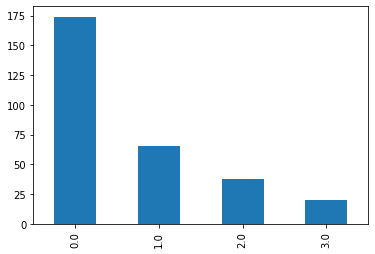

In [38]:
df['ca'].value_counts().plot.bar()

<AxesSubplot:>

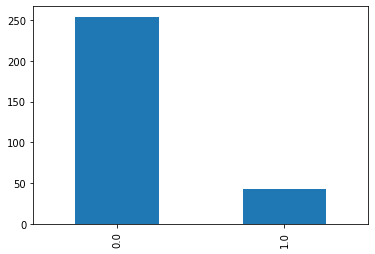

In [39]:
df['fbs'].value_counts().plot.bar()

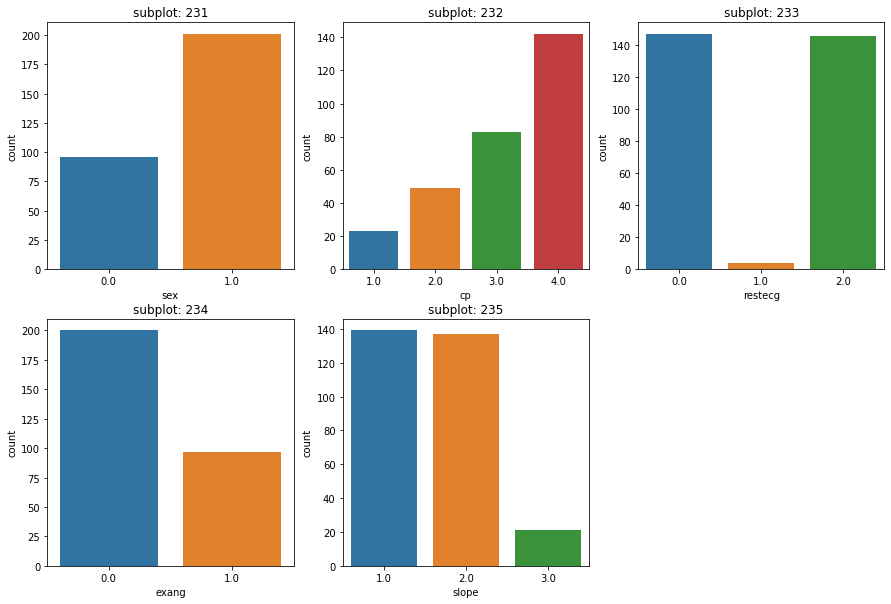

In [40]:
fig = plt.figure(figsize=(15,10))

#  subplot #1
plt.subplot(231)


#  subplot #2
plt.subplot(232)
plt.title('subplot: 232')
sns.countplot(data=df, x='cp')

#  subplot #3
plt.subplot(233)


#  subplot #4
plt.subplot(234)
plt.title('subplot: 234')
sns.countplot(data=df, x='exang')

#  subplot #5
plt.subplot(235)
plt.title('subplot: 235')
sns.countplot(data=df, x='slope')

plt.show()

## 5.2 Bivariate Analysis for EDA

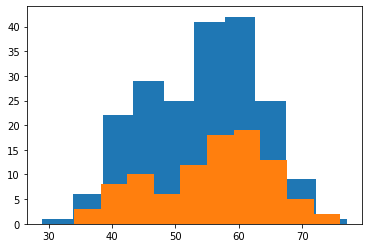

In [41]:
#display the difference in the 'age' values for each gender on the same histogram


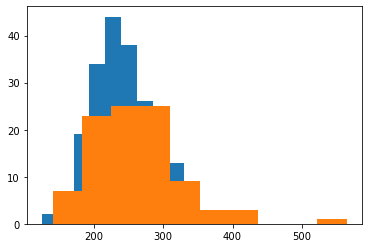

In [42]:
#display the difference in the 'chol' values for each gender on the same histogram
plt.hist(df.loc[df['sex'] == 1.0]['chol'], label="Male")
plt.hist(df.loc[df['sex'] == 0.0]['chol'], label="Female")
plt.show()

In [43]:
#display the difference in the mean for the numerical variables for each gender, using groupby


,age,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
sex,,,,,,,,,,,
0.0,55.750000,3.145833,133.395833,262.229167,0.125000,0.947917,151.604167,0.229167,0.876042,1.572917,0.260417
1.0,53.965174,3.164179,130.880597,240.243781,0.154229,1.019900,148.641791,0.373134,1.141294,1.616915,0.557214


<AxesSubplot:xlabel='sex', ylabel='count'>

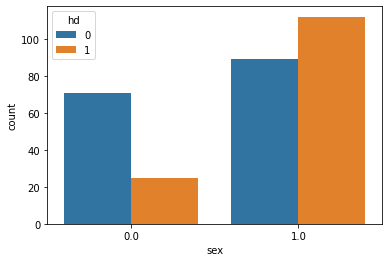

In [45]:
#bivariate plot of the distribution of the target variable with respect to the 'sex' varaible, using sns.countplot
sns.countplot(x='sex',hue='hd',data=df)

## 5.3 Feature Selection EDA

In [46]:
#generating a correlation plot for all the variables
df.corr()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.408945
restbp,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.424052


<AxesSubplot:>

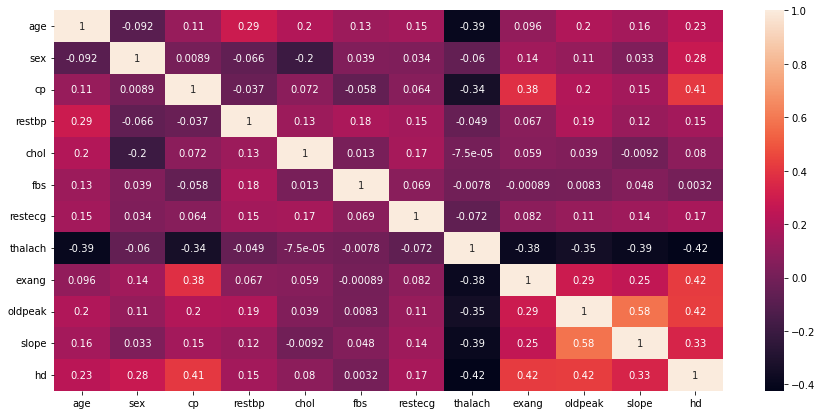

In [47]:
#display correlation as a heatmap


***Notice***
The variables with the 'highest' correlation with the target are 'thalach', 'oldpeak', 'cp', 'exang', & 'slope'

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 42.9+ KB


In [84]:
#creating a DataFrame with highest correlated variables


In [85]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   thalach  297 non-null    float64
 1   exang    297 non-null    float64
 2   oldpeak  297 non-null    float64
 3   slope    297 non-null    float64
 4   hd       297 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 22.0 KB


In [86]:
#seperating the DataFrame into X(features) and y (outcome)
X = df_sel.drop(columns='hd')
y = df_sel['hd']

<AxesSubplot:>

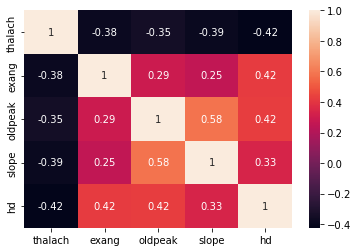

In [87]:
sns.heatmap(df_sel.corr(), annot=True)

## 6.0 Build Classification Tree

In [88]:
# split the data into training and testing sets


In [89]:
# perform training with giniIndex and create the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)

In [90]:
# fit the model 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [91]:
# write a function to make predictions from the classification model
def prediction(X_test, clf_object):
    # predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred  

In [92]:
# write a function to calculate accuracy of the classification model


In [93]:
# print out the prediction using gini 
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1]
Accuracy :  76.0


In [94]:
#Print tree
def printTree(classifier):
    feature_names = ['thalach','exang','oldpeak','slope']
    target_names = ['HD-Yes', 'HD-No']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

In [95]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [96]:
feature_names = ['Chest Pain', 'Blood Circulation', 'Blocked Arteries']

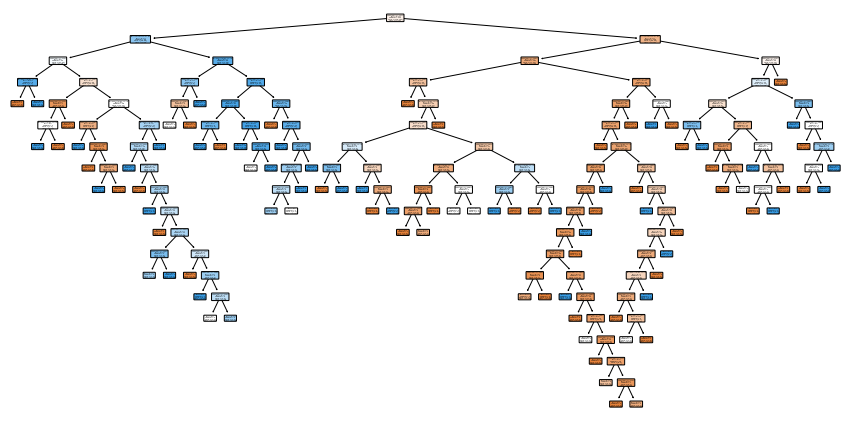

In [62]:
# plot the classification tree
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=['HD-Yes', 'HD-No'], 
          feature_names=feature_names); 

### Note
the **thal** and **ca** variable were not added

## 6.2 Building another decision tree with the categorical variables
### converting them to dummy variables

In [97]:
#create new DataFrame that includes the categorical variable
df_sel_2 = df[['cp', 'oldpeak','exang', 'thal','slope','ca', 'hd']]

In [98]:
#separate into X and Y


In [116]:
#create dummy varaibles out of the categorical variables
X2_encoded = pd.get_dummies(X2, columns=['thal','exang'])
X2_encoded.head()

,cp,oldpeak,slope,ca,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0
0,1.0,2.3,3.0,0.0,0,1,0,1,0
1,4.0,1.5,2.0,3.0,1,0,0,0,1
2,4.0,2.6,2.0,2.0,0,0,1,0,1
3,3.0,3.5,3.0,0.0,1,0,0,1,0
4,2.0,1.4,1.0,0.0,1,0,0,1,0


In [117]:
# split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y2, random_state=42)

In [118]:
# perform training with giniIndex and create the classifier object 


In [119]:
# fit the new model 
clf_gini_2.fit(X2_train, y2_train) 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [120]:
# write a function to make predictions from the classification model


Predicted values:
[0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0
 1]


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1])

In [121]:
# print out the prediction using gini 
print("Results Using Gini Index:")
y2_pred_gini = prediction(X2_test, clf_gini_2)
cal_accuracy(y2_test, y2_pred_gini)

Results Using Gini Index:
Predicted values:
[0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0
 1]
Accuracy :  82.66666666666667


In [122]:
clf_dt_2 = DecisionTreeClassifier(random_state=42)
clf_dt_2 = clf_dt_2.fit(X2_train, y2_train)

In [127]:
feature_names_2 = X2_encoded.columns

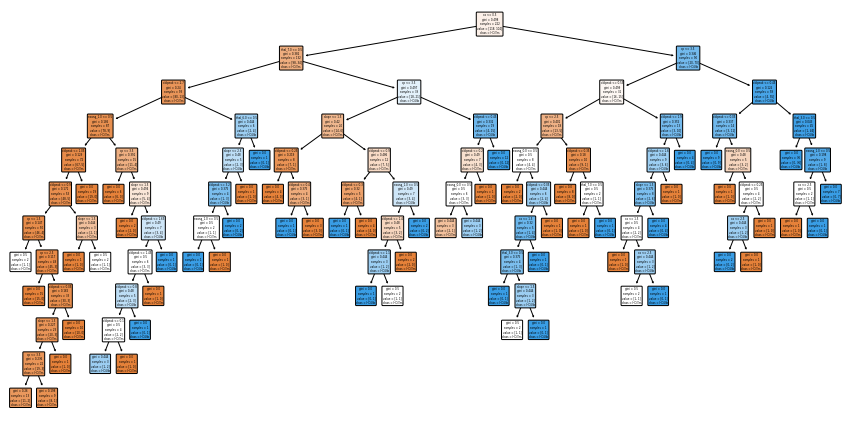

In [128]:
# plot the classification tree
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_2, 
          filled=True, 
          rounded=True, 
          class_names=['HD-Yes', 'HD-No'], 
          feature_names=feature_names_2); 

## 6.3 Pruning Decision Tree using pruning paramater
### The trees all are too deep (too many levels- due to overfit).

In [129]:
# Build and train a new decision tree using a pruning paramater (alpha) value
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015)
clf_dt_pruned = clf_dt_pruned.fit(X2_train, y2_train) 

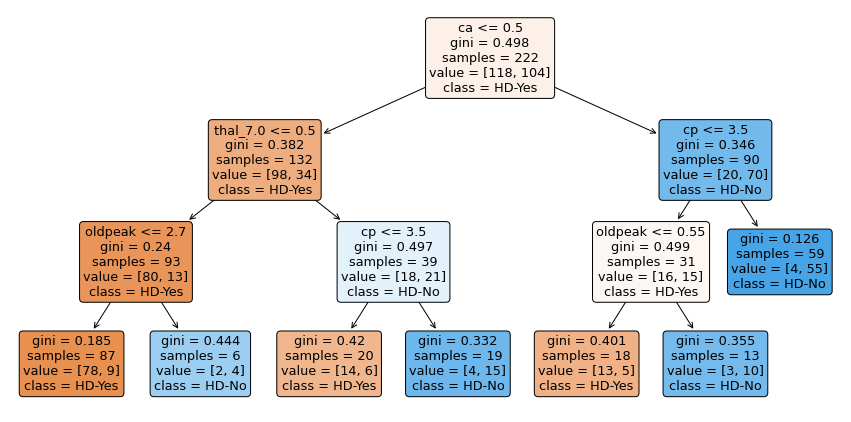

In [130]:
# plot the classification tree


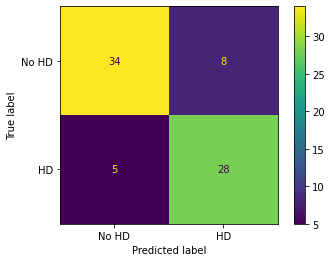

In [132]:
## plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix.
plot_confusion_matrix(clf_dt_pruned, X2_test, y2_test, display_labels=["No HD", "HD"])

#### In the confusion matrix, we see that of the **31 + 8 = 39** people that did not have **Heart Disease**, **34 (87%)** were correctly classified. And of the **5 + 28 = 33** people that have **Heart Disease**, **28 (84%)** were correctly classified. 

Now let's discuss how to interpret the tree.
In each node, we have:
-  The tree's root, we use **ca** to split the observations, making it the most important feature. All
observations with **ca <= 0.5** go to the **left** and all observations with **ca > 0.5** go to the **right**.
- **gini** is the score for that node
- **samples** is number samples are in that node
- **value** number samples in the node are in each category. 
- **class** tells us whichever category is represented most in the node. 

The leaves are nodes without a variable or threshold for splitting the observations.

Both the nodes and leaves are colored by the **class**. **No** is different shades of orange & **Yes** is different shades of blue. The the darker the shade, the lower the **gini** score, and indicates how much the node is skewed towarads the **class**

# In conclusion we...

- **[Imported Data]**

- **[Identified and Dealt with Missing Data]**

- **[Formatted the Data for Decision Trees using One-Hot Encoding])**

- **[Built a Preliminary Classification or Decision Three Trees]**

- **[Pruned the Decision Tree with Cost Complexity Pruning]**

- **[Interpreted and Evaluated the Final Decision Tree]**